# 5.1 Energy Pattern comparison

<hr style="border:2px solid black">

# Outline <a id='index'></a>
1. [Introduction](#1)
1. [Further Analysis using Random Forest](#2)
    * [2.1 Comparative Analysis of Estimated Energy Consumption Patterns in Domestic and Public Buildings](#2.1)
    * [2.2 Comparative Analysis of Estimated Energy Consumption and CO2 emissions)](#2.2)
1. [Conclusion](#3)
1. [References](#4)

<hr style="border:2px solid black">

# 1. Introduction [^](#index) <a name="intro"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp; In this notebook, further analysis has been done to study the comparison of estimated 
energy comparison between public and domestic buildings using Random Forest. Then, the estimated energy consumption
for both buildings is used to study the correlation with CO2 emission. Firstly, estimated energy consumption from
domestic and public buildings is read and displayed in a data frame. Then, both data frames are pre-processed and 
merged before further analysis.<div>

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from numpy.polynomial import Polynomial
from numpy.polynomial.polynomial import Polynomial

In [2]:
pb='/home/ffs223/Downloads/GHGs_coding/DOM_Main code/Job Portfolio/MRES_Project/4.2 PB_Energy Pred_RF.csv'
df=pd.read_csv(pb)

df

,UPRN,YearMonth,TOTAL_Energy(kwh/m2),Estimated Energy_rf (kwh/m2),HEATING_CO2,RENEWABLES_CO2,ELECTRIC_CO2
0,2.001177e+08,2013-08,171.0,131.898825,31.0,0.0,56.0
1,1.009184e+10,2013-12,264.0,110.386215,78.0,0.0,74.0
2,1.009282e+10,2013-12,513.0,264.405802,8124.0,0.0,18475.0
3,1.214114e+07,2014-02,184.5,176.048003,54.0,0.0,62.0
4,1.000230e+11,2014-06,207.0,273.363277,44.0,0.0,69.0
...,...,...,...,...,...,...,...
4685,1.009347e+10,2023-12,62.0,137.693390,0.0,0.0,320.0
4686,2.071479e+08,2023-12,63.0,184.058711,6.0,0.0,27.0
4687,2.071788e+08,2023-12,130.0,133.228405,138.0,0.0,90.0
4688,1.009051e+10,2023-12,136.0,139.495875,68.0,0.0,124.0


In [3]:
d='/home/ffs223/Downloads/GHGs_coding/DOM_Main code/Job Portfolio/MRES_Project/4.1 DOM_Energy Est_RF.csv'
df_d=pd.read_csv(d)

df_d

,UPRN,YearMonth,CO2_EMISS_CURR_PER_FLOOR_AREA,ENERGY_CONSUMPTION_CURRENT,Estimated Energy_DOM_rf (kwh/m2)
0,1.000901e+10,2016-01,73,416,311.897942
1,2.000045e+08,2016-09,66,392,503.967024
2,1.000218e+11,2016-11,40,229,298.208581
3,6.076606e+06,2016-12,52,306,209.680344
4,1.202269e+07,2016-12,54,304,235.480213
...,...,...,...,...,...
4994,1.000215e+11,2023-12,42,241,175.401258
4995,1.000226e+11,2023-12,38,216,94.646806
4996,1.000228e+11,2023-12,99,586,230.967579
4997,1.000230e+11,2023-12,21,122,239.225116


# 2. Further Analysis using Random Forest [^](#index) <a name="2"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;Before further analysis, the column YearMonth is reformat into datetime format for both
dataframes. Then, both dataframes are filter in between the year of 2017 to 2023. Later, both estimated energy
comsunmption are sum up by year.<div>

In [4]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')
df['Year'] = df['YearMonth'].dt.year

df_d['YearMonth'] = pd.to_datetime(df_d['YearMonth'], format='%Y-%m')
df_d['Year'] = df_d['YearMonth'].dt.year

In [5]:
df_pb = df[(df['Year'] >= 2017) & (df['Year'] <= 2023)]
df_dom = df_d[(df_d['Year'] >= 2017) & (df_d['Year'] <= 2023)]


In [6]:
#Sum up total estimated energy consumption for both buildings by year
df_pb_energy = df_pb.groupby('Year')['Estimated Energy_rf (kwh/m2)'].sum().reset_index()
df_dom_energy = df_dom.groupby('Year')['Estimated Energy_DOM_rf (kwh/m2)'].sum().reset_index()


In [7]:
df_energy_pred = pd.merge(df_pb_energy, df_dom_energy, on='Year', how='inner') #merge both dataframes

In [8]:
df_energy_pred['Estimated Energy_rf (kwh/m2)'] = df_energy_pred['Estimated Energy_rf (kwh/m2)'] / 1000
df_energy_pred['Estimated Energy_DOM_rf (kwh/m2)'] = df_energy_pred['Estimated Energy_DOM_rf (kwh/m2)'] / 1000

##  2.1 Comparative Analysis of Estimated Energy Consumption Patterns in Domestic and Public Buildings <a name="2.1"></a> 

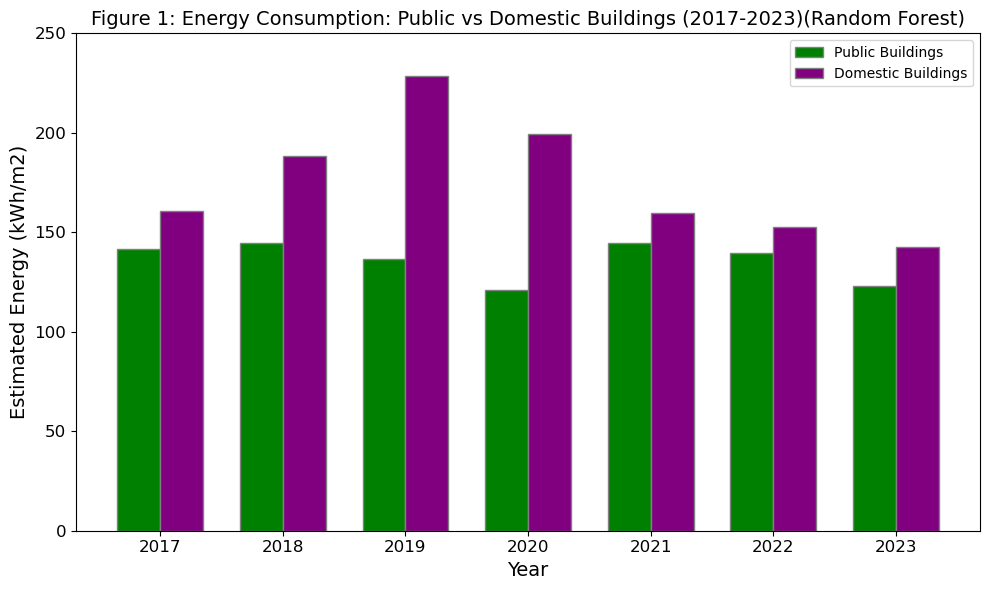

In [9]:
# Plot Estimated Energy for Domestic and Public Buildings
plt.figure(figsize=(10, 6))
bar_width = 0.35
yr = df_energy_pred['Year']

# Bar positions
r1 = range(len(yr))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.bar(r1, df_energy_pred['Estimated Energy_rf (kwh/m2)'], color='green', width=bar_width, edgecolor='grey', label='Public Buildings')
plt.bar(r2, df_energy_pred['Estimated Energy_DOM_rf (kwh/m2)'], color='purple', width=bar_width, edgecolor='grey', label='Domestic Buildings')


plt.xlabel('Year',fontsize=14) #fontweight='bold'
plt.ylabel('Estimated Energy (kWh/m2)',fontsize=14)
plt.title('Figure 1: Energy Consumption: Public vs Domestic Buildings (2017-2023)(Random Forest)',fontsize=14)
plt.xticks([r + bar_width/2 for r in range(len(yr))], yr,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 250)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
#Sum up total actual energy consumption for both buildings by year
df_true_pb = df_pb.groupby('Year')['TOTAL_Energy(kwh/m2)'].sum().reset_index()
df_true_dom = df_dom.groupby('Year')['ENERGY_CONSUMPTION_CURRENT'].sum().reset_index()



df_true = pd.merge(df_true_pb, df_true_dom, on='Year', how='inner')


df_final = pd.merge(df_energy_pred, df_true, on='Year', how='inner', 
                    suffixes=('_pred', '_true'))

In [11]:
df_final['Estimated Energy_rf (kwh/m2)'] = df_final['Estimated Energy_rf (kwh/m2)']
df_final['Estimated Energy_DOM_rf (kwh/m2)']= df_final['Estimated Energy_DOM_rf (kwh/m2)']
df_final['TOTAL_Energy(kwh/m2)'] = df_final['TOTAL_Energy(kwh/m2)'] / 1000 
df_final['ENERGY_CONSUMPTION_CURRENT'] = df_final['ENERGY_CONSUMPTION_CURRENT'] / 1000  

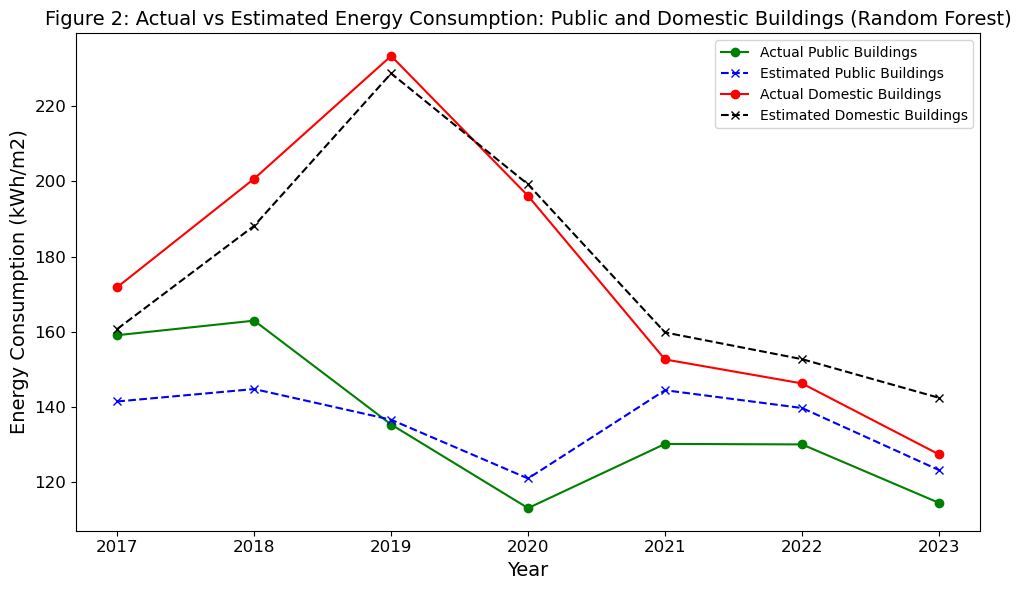

In [12]:


# Plot
plt.figure(figsize=(10, 6))

#pb
plt.plot(df_final['Year'],df_final['TOTAL_Energy(kwh/m2)'], color='green', label='Actual Public Buildings', marker='o')
plt.plot(df_final['Year'], df_final['Estimated Energy_rf (kwh/m2)'], color='blue', linestyle='--', label='Estimated Public Buildings', marker='x')

# dom
plt.plot(df_final['Year'], df_final['ENERGY_CONSUMPTION_CURRENT'], color='red', label='Actual Domestic Buildings', marker='o')
plt.plot(df_final['Year'], df_final['Estimated Energy_DOM_rf (kwh/m2)'], color='black', linestyle='--', label='Estimated Domestic Buildings', marker='x')


plt.xlabel('Year', fontsize=14)
plt.ylabel('Energy Consumption (kWh/m2)', fontsize=14)
plt.title('Figure 2: Actual vs Estimated Energy Consumption: Public and Domestic Buildings (Random Forest)', fontsize=14)

plt.xticks(df_energy_pred['Year'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;Figure 2 illustrates the comparison of Actual versus Estimated Energy Consumption 
for Public and Domestic Buildings between the year of 2017 to 2023.The trend for actual and estimated values for 
public and domestic buildings is the same, although there is a gap between actual and estimated values for domestic
buildings. However, the accuracy score of R2 for domestic buildings is 0.826, which is acceptable. Since only 
Random Forest (RF) scores more than 0.7 for public buildings, we chose RF as the Machine Learning (ML) model to 
compare estimated energy consumption for both buildings.
<div>

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 demonstrates the Estimated Energy Consumption for the Public and   
Domestic buildings between the years 2017 and 2023 will be using RF. Energy consumption for public buildings 
decreased slightly between 2018 and 2020 and kept below 150 kWh/m² after the lockdown in 2020  
The total number of public buildings is lower than that of domestic buildings, which explains is why the estimated energy 
consumption for public buildings in London is lower than that of domestic buildings. Additionally, in 2020, 
the Department for Energy Security and Net Zero introduced the Public Sector Decarbonisation Scheme to reduce emissions from public sector buildings by 75% by 2037. Moreover, £1.425 billion of grant 
funding over the financial years 2022 to 2023 and 2025 to 2026 to achieve this target, and this explains why 
the energy consumption for the public buildings is maintained lower than 150 kWh/m² [1].     
<div>

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;Furthermore, estimated energy consumption for domestic buildings reached its peak in 2019 
and reduced abruptly from more than 200 kWh/m² in 2019 to 2020 to less than 200 kWh/m² starting in 2021.
This explains that policies implemented before 2020 seem unsuccessful, although some national
policies started in 2013. For instance, the Energy Company Obligation (ECO) began in 2013, when the target was lower-income households and the retrofitting of domestic buildings [2].
Retrofit for the Future started in 2013. It aims to make homes more energy-efficient by upgrading  
heating systems and installing renewable energy [3]. Furthermore, the Green Deal Assessment (GDA), 
which started in 2013, was structured as a loan, but the application was closed in 2015 due to overwhelming demand, and it has already met its financial limit [4]. Moreover, due to urbanization and population growth during this period 
in London. More homes were built, and many existing buildings were occupied, leading to an overall rise in energy 
demand. In addition, there has been a rise in the use of electronic devices, household appliances, and other 
technology that can increase energy demand in domestic buildings. Since these policies are applied nationwide, 
people may not realize the benefits from these initiatives when it started between 2017 and 2020, 
but the estimated energy consumption can be observed that it began to reduce beginning in the year 2021. Multiple policies and funds have been introduced, such as 
the Social Housing Decarbonisation Fund (SHDF), which involves Camden, Islington, and Southwark and is focused more on 
insulation, window upgrades, and lower carbon heating systems [5]. Then, The London Plan sets energy efficiency 
standards for both new buildings and retrofits and mandates high levels of energy efficiency for all types of 
buildings, including public and commercial buildings. It was introduced by the mayor of London in 2004 but
officially published in 2021 under the official London Plan 2021 [6]. Finally, the Mayor of London introduced The London borough-specific retrofit
programme in 2020 with multiple plans, such as the Retrofit Accelerator – Homes initiative, 
followed by the Retrofit London Housing Action Plan in 2021. Thus, the estimated energy consumption 
for domestic buildings is maintained below 150 kWh/m² starting in 2022 and 2023 [7].<div>

##  2.2 Comparative Analysis of Estimated Energy Consumption with CO2 emissions <a name="2.2"></a> 

In [13]:
# Calculate the Pearson correlation coefficient
correlation = df_d['ENERGY_CONSUMPTION_CURRENT'].corr(df_d['CO2_EMISS_CURR_PER_FLOOR_AREA'])

print(f"Correlation between Estimated energy and CO2 emission: {correlation:.4f}")

Correlation between Estimated energy and CO2 emission: 0.9943


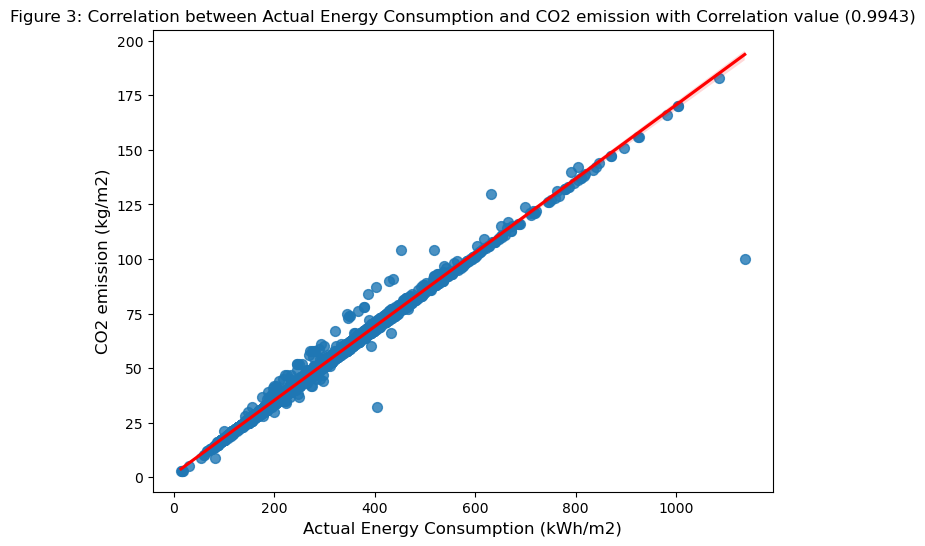

In [14]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='ENERGY_CONSUMPTION_CURRENT', y='CO2_EMISS_CURR_PER_FLOOR_AREA', data=df_d, scatter_kws={'s': 50}, line_kws={'color':'red'})
plt.title(f'Figure 3: Correlation between Actual Energy Consumption and CO2 emission with Correlation value ({correlation:.4f})',fontsize=12)
plt.xlabel('Actual Energy Consumption (kWh/m2)',fontsize=12)
plt.ylabel('CO2 emission (kg/m2)',fontsize=12)
plt.show()


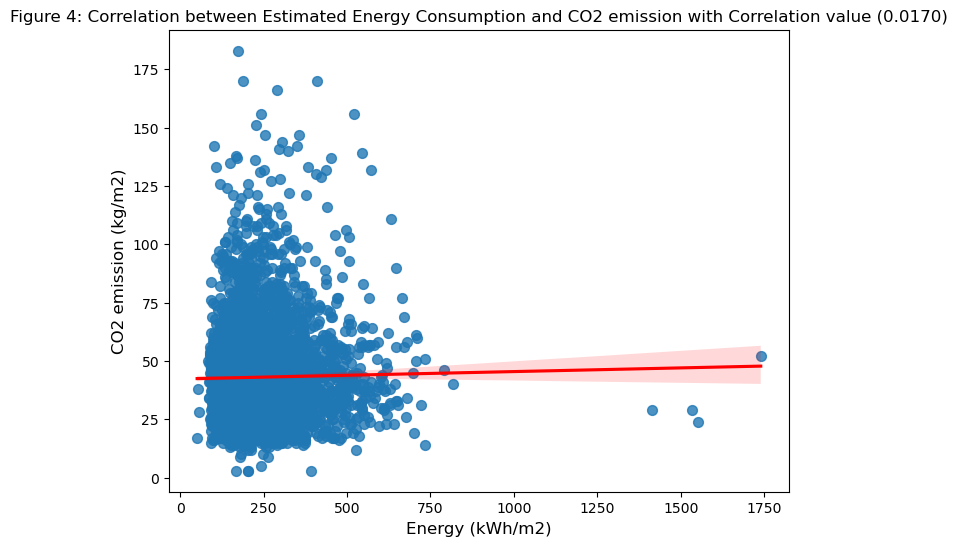

In [15]:
# Calculate the Pearson correlation coefficient
est = df_d['Estimated Energy_DOM_rf (kwh/m2)'].corr(df_d['CO2_EMISS_CURR_PER_FLOOR_AREA'])


plt.figure(figsize=(8, 6))
sns.regplot(x='Estimated Energy_DOM_rf (kwh/m2)', y='CO2_EMISS_CURR_PER_FLOOR_AREA', data=df_d, scatter_kws={'s': 50}, line_kws={'color':'red'})
plt.title(f'Figure 4: Correlation between Estimated Energy Consumption and CO2 emission with Correlation value ({est:.4f})',fontsize=12)
plt.xlabel('Energy (kWh/m2)',fontsize=12)
plt.ylabel('CO2 emission (kg/m2)',fontsize=12)
plt.show()

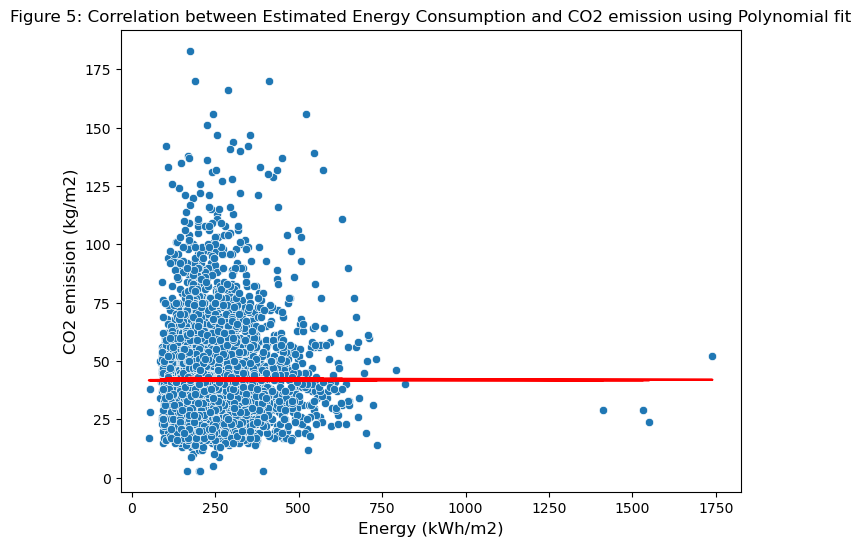

In [18]:


# Fit a polynomial regression model (degree 2)
p = Polynomial.fit(df_d['Estimated Energy_DOM_rf (kwh/m2)'], df_d['CO2_EMISS_CURR_PER_FLOOR_AREA'], 2)

# Predict and plot the fitted curve
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Energy_DOM_rf (kwh/m2)', y='CO2_EMISS_CURR_PER_FLOOR_AREA', data=df_d)
plt.plot(df_d['Estimated Energy_DOM_rf (kwh/m2)'], p(df_d['CO2_EMISS_CURR_PER_FLOOR_AREA']), color='red')
plt.title(f'Figure 5: Correlation between Estimated Energy Consumption and CO2 emission using Polynomial fit',fontsize=12)
plt.xlabel('Energy (kWh/m2)',fontsize=12)
plt.ylabel('CO2 emission (kg/m2)',fontsize=12)
plt.show()

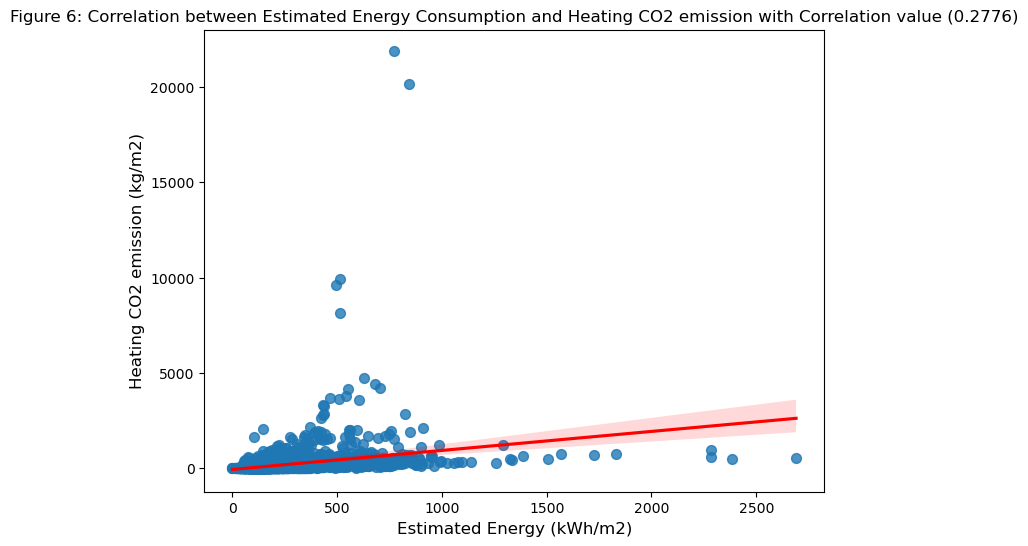

In [16]:
heat =df['TOTAL_Energy(kwh/m2)'].corr(df['HEATING_CO2'])
plt.figure(figsize=(8, 6))
sns.regplot(x='TOTAL_Energy(kwh/m2)', y='HEATING_CO2', data=df, scatter_kws={'s': 50}, line_kws={'color':'red'})
plt.title(f'Figure 6: Correlation between Estimated Energy Consumption and Heating CO2 emission with Correlation value ({heat:.4f})',fontsize=12)
plt.xlabel('Estimated Energy (kWh/m2)',fontsize=12)
plt.ylabel('Heating CO2 emission (kg/m2)',fontsize=12)
plt.show()

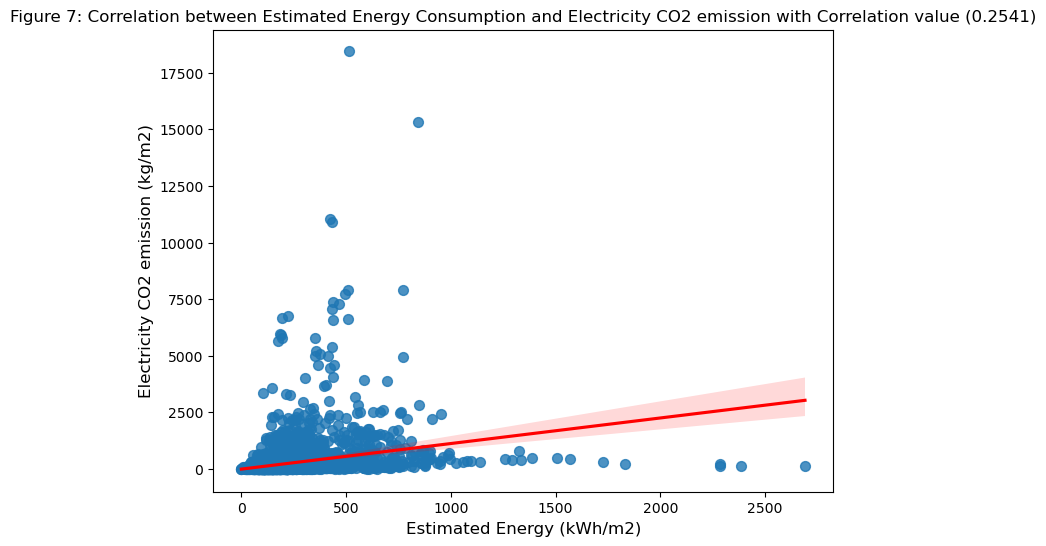

In [19]:
elect =df['TOTAL_Energy(kwh/m2)'].corr(df['ELECTRIC_CO2'])
plt.figure(figsize=(8, 6))
sns.regplot(x='TOTAL_Energy(kwh/m2)', y='ELECTRIC_CO2', data=df, scatter_kws={'s': 50}, line_kws={'color':'red'})
plt.title(f'Figure 7: Correlation between Estimated Energy Consumption and Electricity CO2 emission with Correlation value ({elect :.4f})',fontsize=12)
plt.xlabel('Estimated Energy (kWh/m2)',fontsize=12)
plt.ylabel('Electricity CO2 emission (kg/m2)',fontsize=12)
plt.show()


<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp; Figure 3 represents the correlation between the actual energy consumption and CO2 emissions
for domestic buildings, is highly correlated with a value of 0.99. However, Figure 4 and Figure 5 demonstrate that 
there is no correlation between estimated energy consumption and CO2 emission of domestic buildings using regression
plots and polynomial fit for domestic buildings. Similarly, Figure 6 and Figure 7 portray that there is no 
correlation between estimated energy consumption and CO2 emissions from heating and electricity of public buildings.
Therefore,  using spatial and socioeconomic features only is not enough to determine the correlation between
estimated energy consumption and CO2 emission. Thus, more features from other factors, such as environmental and 
behavioural factors, may help improve the correlation between estimated energy consumption and CO2 emission.<div> 

# 3. Conclusion[^](#index) <a name="3"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;In conclusion, due to population growth and urbanization, the estimated energy consumption 
for domestic buildings is relatively high between the years 2017 to 2020. However, both buildings will maintain below
200 kWh/m2 after the year 2021 due to multiple incentives and subsidies from the government and the Mayor of 
London. Similarly, there is no correlation between estimated energy consumption and CO2 emission for domestic and 
public buildings. Therefore, for future work, including environmental and behavioural factors may improve the correlation  between 
estimated energy consumption with the CO2 emission.<div>

# 4. References[^](#index) <a name="4"></a> 

[1] UK Department for Energy Security and Net Zero. (2023). Public Sector Decarbonisation Scheme Phase 3a: Summary report.  
    https://assets.publishing.service.gov.uk/media/65d89ceb87005a001a80f8e4/psds-phase-3a-summary-report.pdf

[2] Ofgem (2024). Energy Company Obligation (ECO).  
    https://www.ofgem.gov.uk/environmental-and-social-schemes/energy-company-obligation-eco

[3] UK Department for Business, Energy & Industrial Strategy. (2014). Retrofit for the future: A guide to making retrofit work.  
    https://assets.publishing.service.gov.uk/media/5a82135fe5274a2e87dc1041/Retrofit_for_the_future_-_A_guide_to_making_retrofit_work_-_2014.pdf

[4] UK Government (2015, July 23). Applications to the Green Deal Home Improvement Fund close.  
    https://www.gov.uk/government/news/applications-to-the-green-deal-home-improvement-fund-close

[5] UK Government (2023, July 20). Social Housing Decarbonisation Fund: Wave 2.2.  
    https://www.gov.uk/government/publications/social-housing-decarbonisation-fund-wave-22

[6] Greater London Authority (2021). The London Plan 2021: Table of contents.  
    https://www.london.gov.uk/programmes-strategies/planning/london-plan/the-london-plan-2021-table-contents

[7] Greater London Authority (2024). Retrofit Accelerator - Homes.  
    https://www.london.gov.uk/programmes-strategies/environment-and-climate-change/net-zero-energy/zero-carbon-accelerator/retrofit-accelerator-homes
